<a href="https://colab.research.google.com/github/anshuldeoli/EDA_Project_Team_Notebook/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#1. **Playstore Data (main dataset)**

This contains data on the Google Play applications. It has 10,841 rows of data witch has following columns:

*  App Category: Category of the app. This could be beauty, business, medical,art and design entertainment, education...etc.

*  Rating: It has How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

*  Reviews: number of user reviews each app has received.

*  Size: The memory size needed to install the application.
 
*  Installs: The number of times each application has been installed by users.

*  Type: Whether the app is free or a paid app.

*  Price: The price of the app.

*  Content Rating: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

*  Genres: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

*  Last Updated: Release date of the most recent update for the app.

*  Current Ver: The app's current version.

*  Android Ver: The oldest version of Android OS supported by the app.

#**Importing Data & Modules**

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading CSV Files
file_path = '/content/drive/MyDrive/Colab Notebooks/Self Project/Copy of Play Store Data.csv'
df=pd.read_csv(file_path)

In [ ]:
# Printing first five rows of dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.shape

(10841, 13)

###**There are 10841 rows and 13 coulmns in our dataset**

# **Data Cleaning (Playstore Data)**

In [ ]:
# Checking data types of features present in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Created copy of our dataset
df_new = df.copy()

In [ ]:
# Cheking for how many null values present in our DataFrame
df_new.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

###**From above we can see in our dataset 'Rating' coulmn has 1474 null values which is maximum as compare to other columns.**

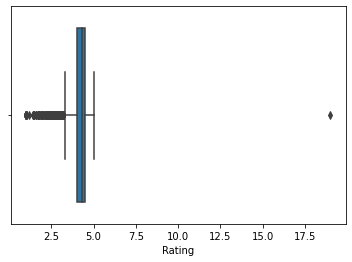

In [ ]:
# Boxplot to see whether any outlier present in rating column or not
sns.boxplot(x=df_new['Rating'])

### From above boxplot we can see there is outlier present in 'Rating' coulmn

In [ ]:
# Finding outlire present in Rating column because Rating should not to be more than 5.0
df_new[df_new.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# To Drop the outlier 
df_new.drop([10472],inplace=True)

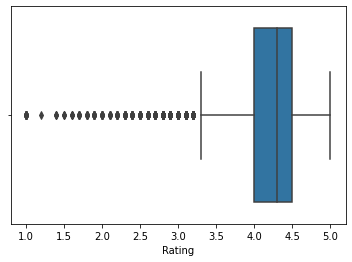

In [ ]:
sns.boxplot(x=df_new['Rating'])

In [ ]:
# Filling all null values present in 'Rating' coulmn with the median.
median_value= df_new['Rating'].median()
df_new['Rating'].fillna(value=median_value, inplace=True)

In [ ]:
df_new['Rating'].isnull().sum()

0

###**Now we can see there is no null value present in the 'Rating' column.**

In [ ]:
#Converted 'Reviews' data type from object which included junk to float. 
df_new['Reviews'] = pd.to_numeric(df_new['Reviews'],errors='coerce').convert_dtypes()

In [ ]:
# Replacing multiple string i.e '+' and ',' present in 'Price' column.
df_new['Price'] = df_new['Price'].str.replace('$','').replace('Everyone','0.0').astype('float')

NameError: ignored

In [ ]:
# Created function to convert all mb and kb in size and column to int
def covert_str_to_int(value):
  if value[-1:] == 'k':
    return float(value[:-1])*1024
  elif value[-1:] == 'M':
    return float(value[:-1])*1024*1024
  else:
    return np.nan

In [ ]:
# convert all mb and kb in size and column to int
df_new['Size'] = df_new['Size'].map(lambda x: covert_str_to_int(x))


In [ ]:
# Replace the vlaues with Nan
df_new['Size'] =df_new.Size.replace('Varies with device', np.NaN)

In [ ]:
# null values generated by size column
df_new.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
# Converted object data type of size column to numeric
df_new['Size'] = pd.to_numeric(df_new['Size'])

In [ ]:
# Drop the Null Values and size column
df_new.dropna(subset=['Size'], inplace=True)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   Int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   object 
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: Int64(1), float64(3), object(9)
memory usage: 1009.2+ KB


In [ ]:
# Removing '+' and ',' presnt in installs column
df_new['Installs']= df_new['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df_new['Installs']= df_new['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))

In [ ]:
# Converted installs column data type from 'str' to 'int'
df_new['Installs']= df_new['Installs'].astype('int')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   Int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: Int64(1), float64(3), int64(1), object(8)
memory usage: 1009.2+ KB


##**All the columns are converted into required data types**

###Dropping Unwanted Columns in Data Frame

In [ ]:
# Dropped 'Last Updated','Current Ver','Android Ver' column from our data type.
df_new.drop(['Last Updated','Current Ver','Android Ver'],axis =1, inplace = True)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   Int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: Int64(1), float64(3), int64(1), object(5)
memory usage: 794.8+ KB


In [ ]:
df_new.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.193384,2.490487e+05,2.256133e+07,7.114842e+06,1.184366
std,0.502702,1.716211e+06,2.368637e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,5.138022e+06,1.000000e+03,0.000000
50%,4.300000,7.420000e+02,1.363149e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.145728e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.048576e+08,1.000000e+09,400.000000


#**Data Exploration & Visualization**

In [ ]:
# Number of application presnt in playstore data with respect to playstore category.
df_new['Category'].value_counts()

FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

In [ ]:
df = pd.DataFrame(df_new,columns=['Category','Rating'])

In [ ]:
df

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3
...,...,...
10835,BUSINESS,4.3
10836,FAMILY,4.5
10837,FAMILY,5.0
10838,MEDICAL,4.3


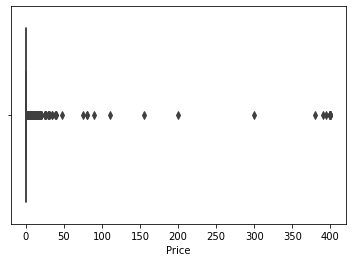

In [ ]:
sns.boxplot(x=df_new['Price'])

### **From above boxplot we can see that there are very few aaps which are having price more than $50.**
### **So we are dropping them as they are treated as outlier at the time of visualization.** 

In [ ]:
df = df_new.copy()

In [ ]:
df.drop(df[df['Price']>=50].index,inplace=True)

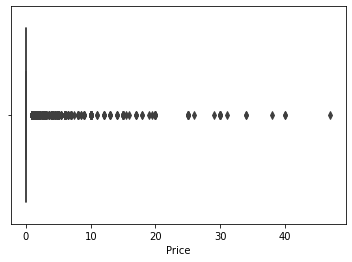

In [ ]:
sns.boxplot(x=df['Price'])

In [ ]:
df_new.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.073701,0.066039,0.046391,-0.018861
Reviews,0.073701,1.000000,0.238214,0.627720,-0.009839
Size,0.066039,0.238214,1.000000,0.164787,-0.023007
Installs,0.046391,0.627720,0.164787,1.000000,-0.010481
Price,-0.018861,-0.009839,-0.023007,-0.010481,1.000000


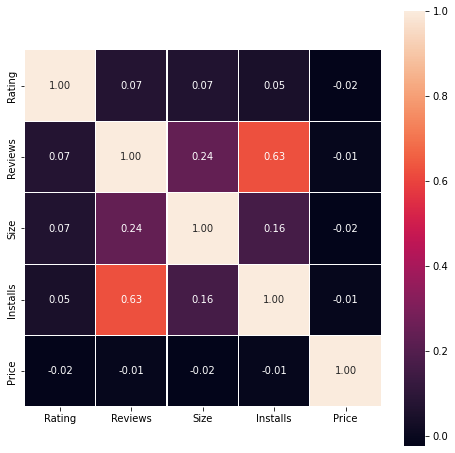

In [ ]:
# Heatmap for checking correlation between columns in playstore Dataframe
fig, axes =plt.subplots(figsize=(8, 8))
sns.heatmap(df_new.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

Number of reviews is highly correlated with the number of installs of the application.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


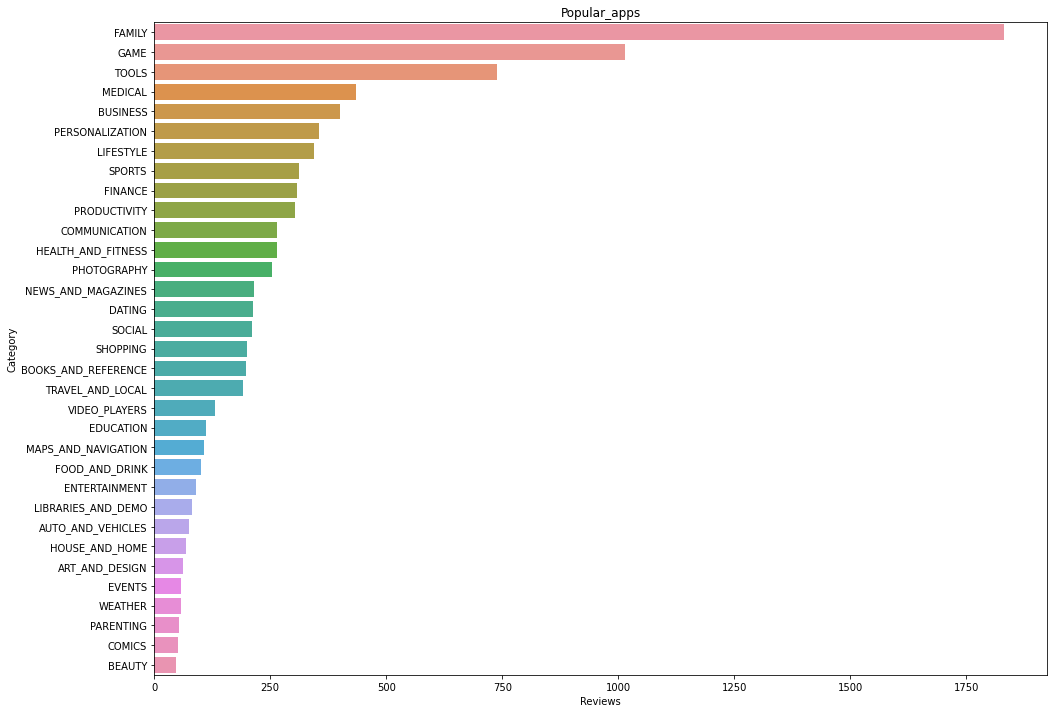

In [ ]:
# Plotting barplots for visualize apps reviews w.r.t. category.
apps_category =df_new.Category.value_counts()
plt.figure(figsize=(16, 12))
sns.barplot(apps_category, apps_category.index)
plt.ylabel('Category')
plt.xlabel('Reviews')
plt.title('Popular_apps')
plt.show()

**So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are under Family & Game category and least are of Beauty & Comics Category.**


####**Which category of Apps from the Content Rating column are found more on playstore.**

In [ ]:
x2 = df_new['Content Rating'].value_counts().index
y2 = df_new['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

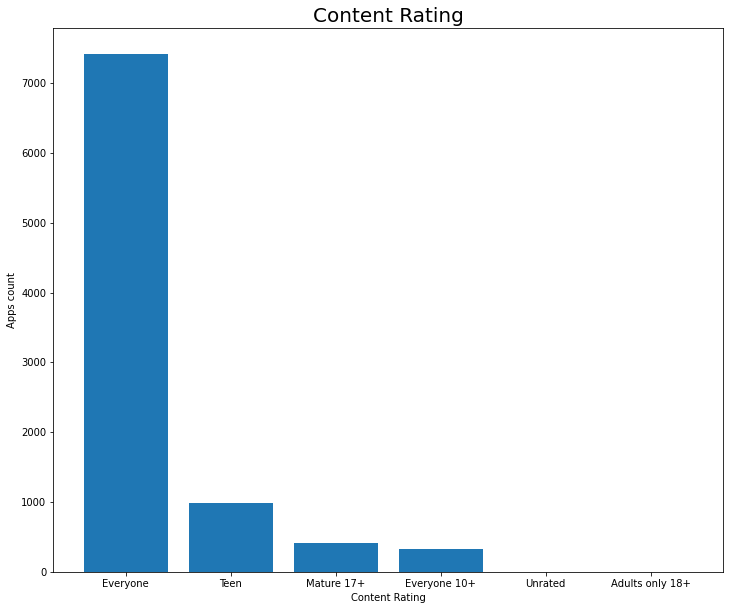

In [ ]:
# Plotting the bar graph to visualize Content Rating.
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8, alpha= 1);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps count');
plt.xlabel('Content Rating');

###**From the above plot we can see that *Everyone* category having majority app count.**

In [ ]:
# Creating Dataframe for category wise app installs.
highest_Installs_df =df_new.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

In [ ]:
highest_Installs_df.head()

,Installs
Category,
GAME,29874564253
FAMILY,6798793425
COMMUNICATION,4941943051
NEWS_AND_MAGAZINES,4252005650
TOOLS,3527094815


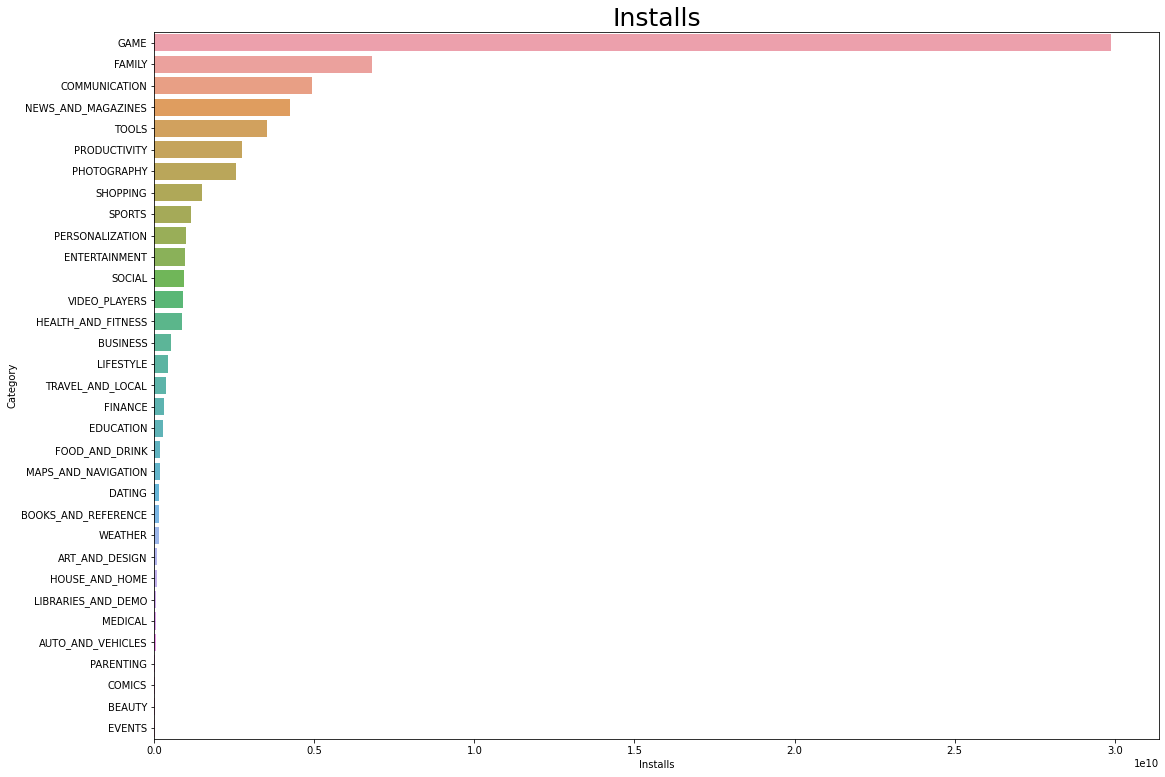

In [ ]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9)
graph.set_title("Installs", fontsize = 25);

**From above plot we can see that GAME, FAMILY, COMMUNICATION,    NEWS_AND_MAGAZINES,TOOLS are the most installed category on the playstore.**

**Let's Visualize top category wise app and see which app is installed most on the playstore**

**Top installed apps in any category**

In [ ]:
# Created function for getting top apps w.r.t category
def top_apps_category(str):
    top = df_new[df_new['Category'] == str]
    top_apps = top.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(8,5))
    plt.title('Top Installed Apps',size = 10);    
    graph = sns.barplot(x = top_apps.App, y = top_apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

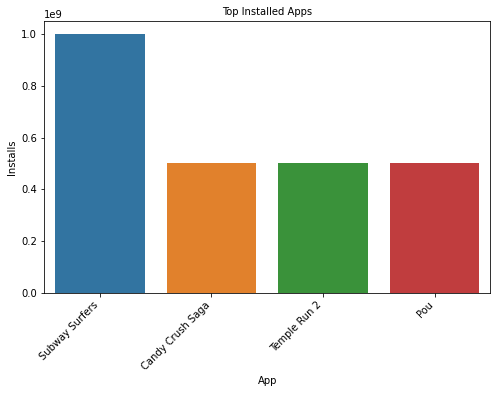

In [ ]:
# Top apps for 'GAME' category
top_apps_category('GAME')

'Subway Surfers', 'Candy Crush Saga', 'Temple Run 2', and 'Pou' are the top install apps of Game category on Playstore.


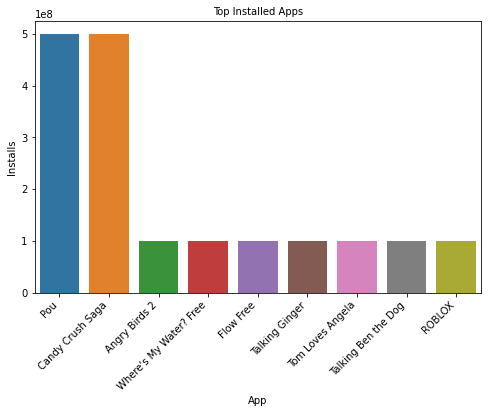

In [ ]:
# Top apps for 'FAMILY' category
top_apps_category('FAMILY')

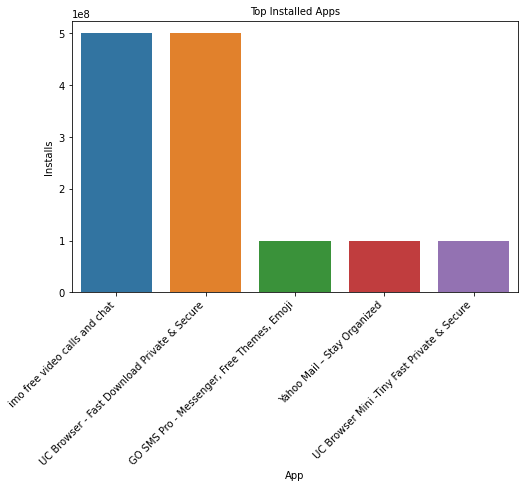

In [ ]:
# Top apps for 'COMMUNICATION' category
top_apps_category('COMMUNICATION')

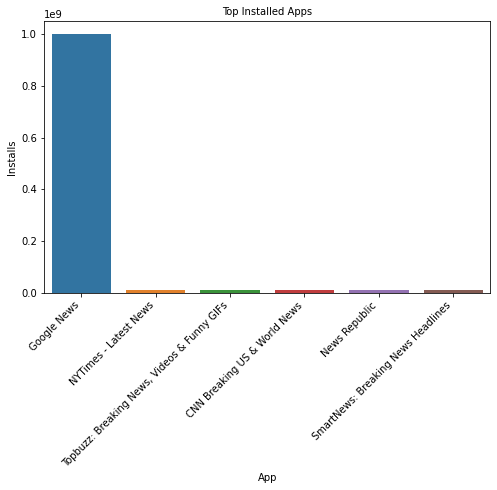

In [ ]:
# Top apps for 'NEWS_AND_MAGAZINES' category
top_apps_category('NEWS_AND_MAGAZINES')

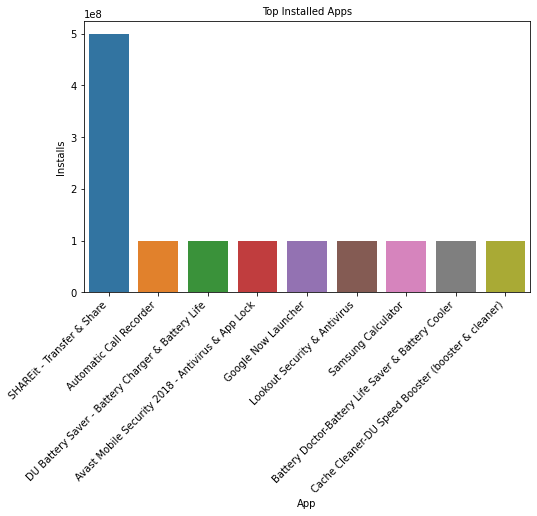

In [ ]:
# Top apps for 'Tools' category
top_apps_category('TOOLS')

####**Make a jointplot to understand the effect of size on rating**

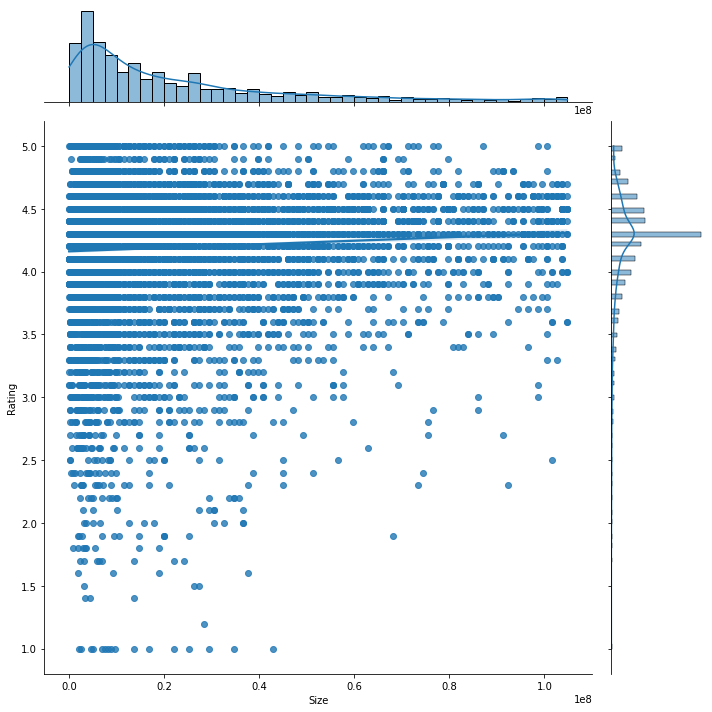

In [ ]:
# Visualize the relation between 'Size' and 'Rating'.
sns.jointplot(x = df_new['Size'], y = df_new['Rating'], height=10,  kind= 'reg')
plt.show()

**From above jointplot we can see the app size increases less no of rating.**
**We can say that as app size increase less no of users will use it.**

**Most user gives rating more than 3 - 3.5 to larger size of apps it might be due to its great features.**


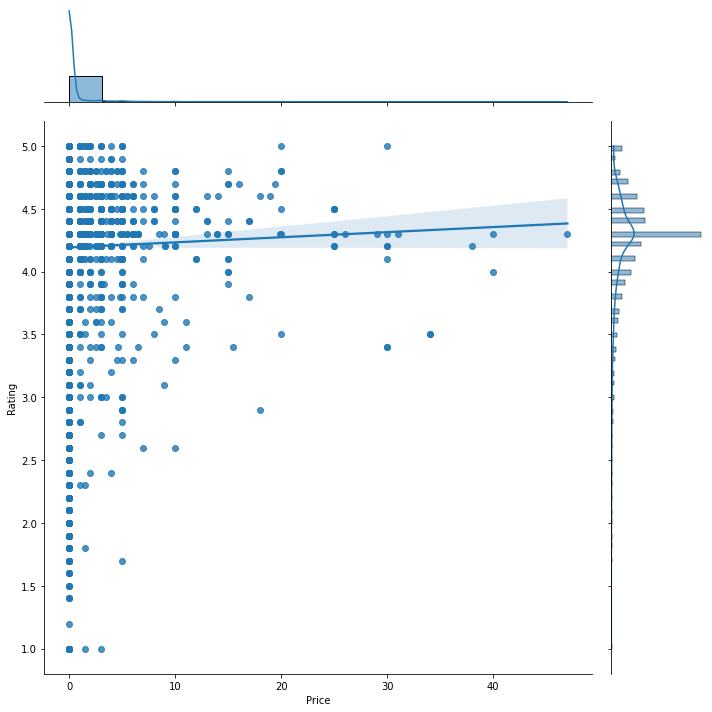

In [ ]:
# Visualize the relation between 'Price' and 'Rating'.
sns.jointplot(x = df['Price'], y = df['Rating'], height=10, kind ='reg')
plt.show()

**App with price cost 0$ having large number of users rating**

**As the Price of apps increased greater than 10$ no of rating decreases.** 

##**Plot a visualization graph to view what portion of the apps in the play store are paid and free.**

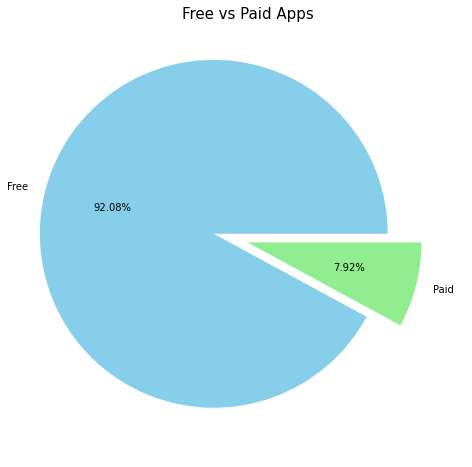

In [ ]:
# Plot the pie chart of Paid Apps vs Free Apps
plt.subplots(figsize=(12,8))
Free_vs_paid = df_new.groupby('Type').size()
colors = ["skyblue","lightgreen"]
explode = (0.2,0)
plt.pie(Free_vs_paid, explode=explode, colors=colors,labels=['Free','Paid'],autopct='%.2f%%')
plt.title('Free vs Paid Apps', size = 15)
plt.show()

**From the above graph we can see that 92%(Approx.) of apps in google play store are free and 8%(Approx.) are paid.**


###Count of applications in each category differentiated by their type

In [ ]:
app_count = df_new.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

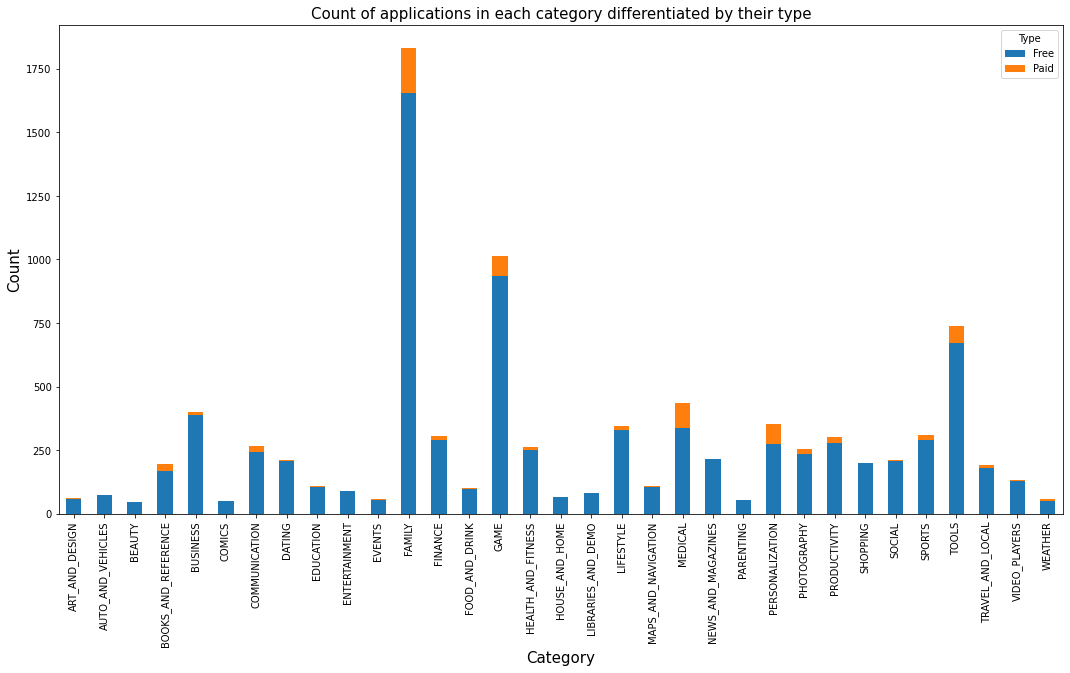

In [ ]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').reset_index()
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type",size = 15)
plt.show()

#####**It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Games and Tools, as well as Social categories were free to install.**


#**Sentiment Analysis**

This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:

App : Name of the app.

Translated_Review: Either the original review in English, or a translated version if the orignal review is in another language.

Sentiment: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral or Negative.

Sentiment_Polarity: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive). Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e. it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.

Sentiment_Subjectivity: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

In [ ]:
# Loading and Cleaning the User Reviews Dataset and dropping the null values
user_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Self Project/Copy of User Reviews.csv')
user_reviews.dropna(inplace=True)

In [ ]:
user_reviews.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
user_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [ ]:
# Merge reviews dataset with apps 
merge_df = pd.merge(df_new, user_reviews, on='App', how = 'inner')


In [ ]:
# Printing first five rows of merge dataset.
merge_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,I hate,Negative,-0.800,0.900000


In [ ]:
merge_df.shape

(45046, 14)

In [ ]:
# Summary of the dataset
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45046 entries, 0 to 45045
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     45046 non-null  object 
 1   Category                45046 non-null  object 
 2   Rating                  45046 non-null  float64
 3   Reviews                 45046 non-null  Int64  
 4   Size                    45046 non-null  float64
 5   Installs                45046 non-null  int64  
 6   Type                    45046 non-null  object 
 7   Price                   45046 non-null  float64
 8   Content Rating          45046 non-null  object 
 9   Genres                  45046 non-null  object 
 10  Translated_Review       45046 non-null  object 
 11  Sentiment               45046 non-null  object 
 12  Sentiment_Polarity      45046 non-null  float64
 13  Sentiment_Subjectivity  45046 non-null  float64
dtypes: Int64(1), float64(5), int64(1), obj

##**Sentiment Division for different type of reviews**


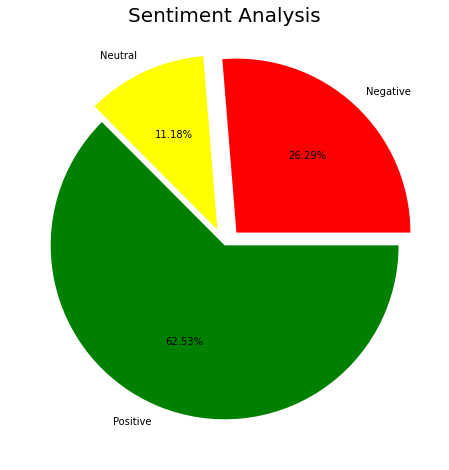

In [ ]:
plt.subplots(figsize=(12,8))
Sentiments = merge_df.groupby('Sentiment').size()
colors = ["red","yellow","green"]
explode = (0.1,0.1,0)
plt.pie(Sentiments, explode=explode, colors=colors, labels=['Negative','Neutral','Positive'],autopct='%.2f%%')
plt.title('Sentiment Analysis', size = 20)
plt.show()

**It can be seen from the above plot that the number of positive reviews are more than negative and neutral ones.**


##**Distribution of type of reviews on the basis of category wise data in the dataset**

In [ ]:
category_sentiment = merge_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [ ]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

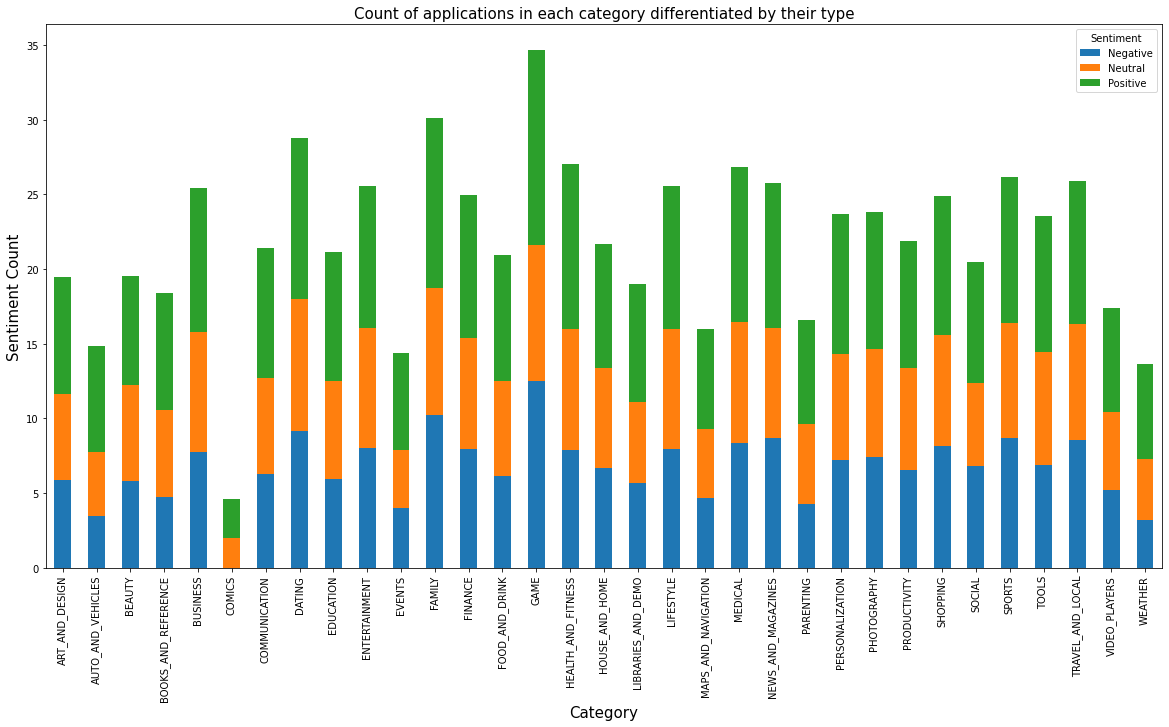

In [ ]:
# Sentiment Count of applications in each category differentiated by their type.
df_sentiment = category_sentiment.pivot('Category','Sentiment','log_sentiment_count').reset_index()
df_sentiment.set_index('Category').plot(kind='bar',stacked=True,figsize=(20,10))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Sentiment Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type",size = 15)
plt.show()

**It can be seen from the above plot that the number of positive reviews are more than negative and neutral ones.**


##**Sentiment Polarity for free and paid apps**

In [ ]:
paid_apps = merge_df[merge_df['Type']=='Paid']
free_apps = merge_df[merge_df['Type']=='Free']

In [ ]:
print("Free apps - Sentiment percentage\n{}".format(free_apps['Sentiment'].value_counts(normalize=True) * 100))


print("\n")


print("Paid Apps - Sentiment Percentage \n{}".format(paid_apps['Sentiment'].value_counts(normalize=True) * 100))


Free apps - Sentiment percentage
Positive    62.224381
Negative    26.497831
Neutral     11.277788
Name: Sentiment, dtype: float64


Paid Apps - Sentiment Percentage 
Positive    80.051151
Negative    14.578005
Neutral      5.370844
Name: Sentiment, dtype: float64


## **Positive Sentiment percentage for paid apps is more than free apps, It might be it's less number of Installs.**


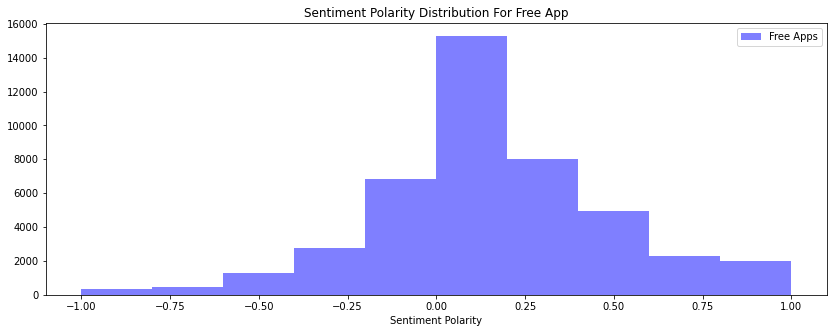

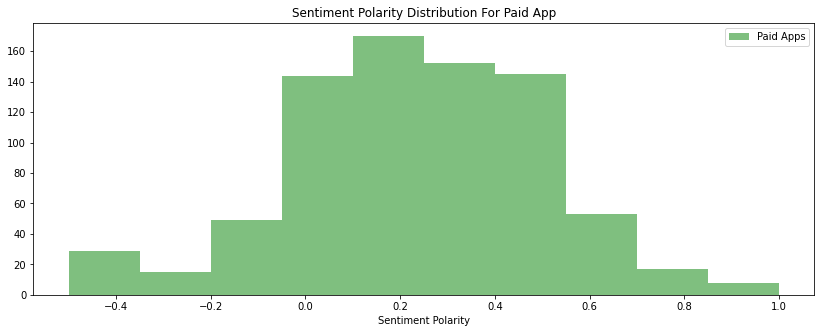

In [ ]:
# Sentiment polarity for free apps
plt.figure(figsize=(14,5))
plt.hist(free_apps["Sentiment_Polarity"], color="blue",alpha=.5, label="Free Apps")

plt.title('Sentiment Polarity Distribution For Free App')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()



print('\n')


# Sentiment polarity for paid apps
plt.figure(figsize=(14,5))
plt.hist(paid_apps["Sentiment_Polarity"], color="green",alpha=.5, label="Paid Apps")

plt.title('Sentiment Polarity Distribution For Paid App')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()

##**Sentiment Subjectivity for free and paid apps**

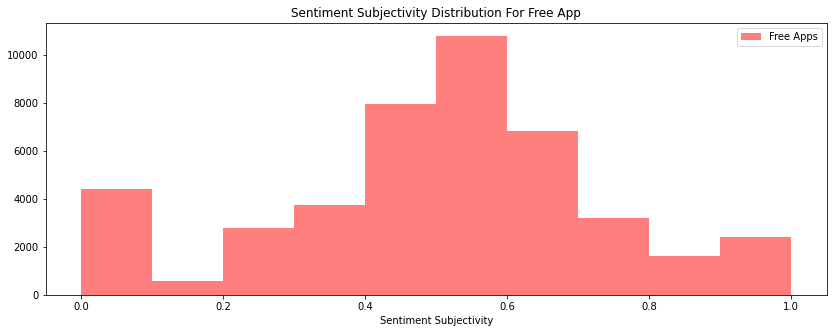

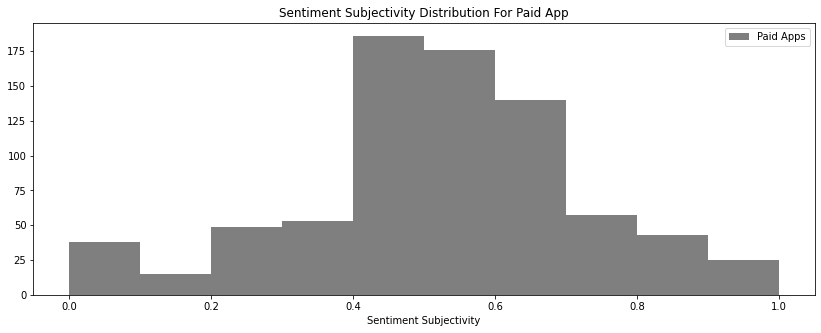

In [ ]:
# Sentiment subjectivity for free apps
plt.figure(figsize=(14,5))
plt.hist(free_apps["Sentiment_Subjectivity"], color="red",alpha=.5, label="Free Apps")

plt.title('Sentiment Subjectivity Distribution For Free App')
plt.xlabel('Sentiment Subjectivity')
plt.legend(loc='upper right')
plt.show()



print('\n')


# Sentiment subjectivity for paid apps
plt.figure(figsize=(14,5))
plt.hist(paid_apps["Sentiment_Subjectivity"], color="black",alpha=.5, label="Paid Apps")

plt.title('Sentiment Subjectivity Distribution For Paid App')
plt.xlabel('Sentiment Subjectivity')
plt.legend(loc='upper right')
plt.show()

#***Summary***

*  **Average rating of apps on playstore is 4.1.**

*  **Apps under Family & Game category getting most number of reviews and very least reviews least for Beauty & Comics Category.**

*  **Everyone category having majority of apps count on Google PlayStore.**

*  **'GAME', 'FAMILY', 'COMMUNICATION', 'NEWS_AND_MAGAZINES', 'TOOLS' are the most installed category on Playstore.**

*  **'Subway Surfers', 'Candy Crush Saga', 'Temple Run 2', and 'Pou' are the top install apps of GAME Category on Playstore.**

*  **As the app size increase less no of users will use it, most user gives rating more than 3 - 3.5 to larger size of apps it might be due to its great features.**

*  **App with price cost 0 having large number of users rating, As the Price of apps increased greater than 10$ no of rating decreases**

*  **92%(Approx.) of apps in google play store are free and 8%(Approx.) are paid.**

*  **Certain apps categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Games and Tools, as well as Social categories which are free to install.**

*  **The number of positive reviews are more than negative and neutral ones amoung all apps Categories.**

* **Positive Sentiment percentage for paid apps is more than free apps, It might be it's less number of installs.**

 




# **Reference**

*  https://stackoverflow.com/
*  https://www.geeksforgeeks.org/
*  https://www.w3schools.com/
